# CNN intro

X_train.shape=(50000, 32, 32, 3), X_test.shape=(10000, 32, 32, 3)


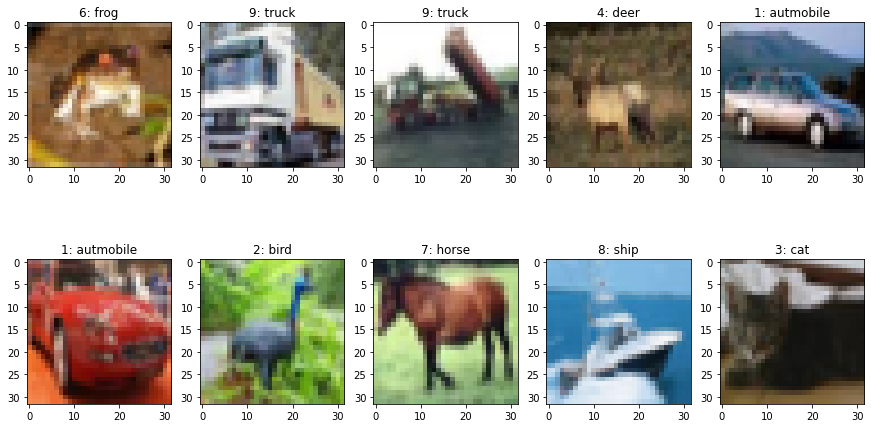

In [10]:
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
from tensorflow.keras.datasets.cifar10 import load_data 

(X_train,y_train),(X_test,y_test) = load_data()
print(f"{X_train.shape=}, {X_test.shape=}")

y_train = y_train.ravel()

labels = ["airplane","autmobile","bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"] 

fig, axes = plt.subplots(2,5, figsize=(15,8))

for i, ax in enumerate(axes.flatten()): 
    ax.imshow(X_train[i])
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 

scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

ValueError: Found array with dim 4. MinMaxScaler expected <= 2.

# CNN model

In [16]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam 

def CNN_model(learning_rate=0.001, drop_rate = .5, kernels = [32,64]): 
    adam = Adam(learning_rate= learning_rate) 

    model = Sequential(name = "CNN_model")

    # the convolutional layers 
    for number_kernel in kernels : 
        conv_layer = Conv2D(number_kernel, kernel_size = (3,3), activation = "relu", kernel_initializer = "he_normal", input_shape = X_train.shape[1:])
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size= (2,2), strides = 2))

    # MLP layers 
    model.add(Flatten()) 
    model.add(Dropout(drop_rate)) 
    model.add(Dense(256, activation = "relu", kernel_initializer = "he_normal")) 
    model.add(Dense(10))

    model.compile(loss="sparse_categorical_crossentropy",optimizer=adam, metrics=["accuracy"]) 

    return model 

model = CNN_model()
model.summary()


Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)              0 

In [13]:
from tensorflow.keras.callbacks import EarlyStopping 

early_stopper = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

model.fit(X_train,y_train)
  

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Hyperparmeter tuning 

In [ ]:
def evaluate_model()